<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>

---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>
**2.** [**Installing & Importing Libraries**](#Section2)<br>
  - **2.1** [**Installing Libraries**](#Section21)
  - **2.2** [**Importing Libraries**](#Section22)

**3.** [**Data Acquisition & Description**](#Section3)<br>
  - **3.1** [**Data Description**](#Section31)
  - **3.2** [**Data Information**](#Section32)

**4.** [**Exploratory Data Analysis**](#Section4)<br>
**5.** [**Post Data Processing**](#Section5)<br>
  - **5.1** [**Data Preparation**](#Section51)<br>
  - **5.2** [**Data Standardization**](#Section52)<br>

**6.** [**Model Development & Evaluation**](#Section6)<br>
  - **6.1** [**Logistic Regression - Baseline Model**](#section61)<br>
  - **6.2** [**Training Model for Prediction**](#section62)<br>
  - **6.3** [**Logistic Regression Model Evaluation**](#section63)<br>    
  - **6.4** [**Using the Model for Prediction**](#section64)<br>

**7.** [**Conclusion**](#Section7)<br>



---
<a name = Section1></a>
# 1. Problem Statement
---
This **dataset** consists of all **required information about the Customer** like **Occupation, Family Income, Gender, Region, Balance Transfer, Children etc.** for **determining High (or) Low Networth customers**.

<br>

Your role as **Data Scientist** is to find: 

- Build a **Regression Model** using the **given dataset**. 

- Predict the **Customer Classification** for **each customer**.

---
<a name = Section2></a>
# 2. Installing & Importing Libraries
---

<a name = Section21></a>
### **2.1 Installing Libraries**

In [ ]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data 
!pip install pandas==0.25

     |████████████████████████████████| 71kB 1.9MB/s 
     |████████████████████████████████| 10.5MB 2.4MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.25.0 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.25.0 which is incompatible.
  Found existing installation: pandas 1.1.2
    Uninstalling pandas-1.1.2:
      Successfully uninstalled pandas-1.1.2


---
<a name = Section22></a>
### 2.2. **Importing Packages** 
---

In [23]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

---
<a name = Section3></a>
# **3. Data Acquisition & Description**
---


- The **Classification of the Customer** is determined by **Occupation, Family Income, Gender, Region, Balance Transfer, Children etc.**.

- Task is to build a **Classification model**

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 8124 | 32 | 7.80 KB| 


| Id | Features | Description |
| :-- | :--| :--| 
|01| **REF_NO** | Reference Number of the customer |
|02| **children** | Number of children each customer has | 
|03| **Age_band** | Age Group to which the customer belongs |
|04| **status** | Marital Status of the customer |
|05| **occupation** | Job or profession of the customer |
|06| **occupation_partner** | Job or profession of the customer's partner |
|07| **home_status** | Home Status of the customers |
|08| **family_income** | Income Range of the customer's family |
|09| **self_employed** | Whether self-employed or not |
|10| **self_employed_partner** | Whether the partner self-employed or not |
|11| **year_last_moved** | Moving Year from the last location of the customer |
|12| **TVarea** | Television Region of the customer |
|13| **post_code** | Postal Code of the customer |
|14| **post_area** | Postal Area of the customer |
|15| **Average_Credit_Card_Transaction** | Average Credit Card Transaction per year by the customer |
|16| **Balance_Transfer** | Transfer of the Balance in an account to another account by the customer |
|17| **Term_Deposit** | Cash Investment Help at Financial Institute provided to the customer |
|18| **Life_Insurance** | Basic Life Insurance Coverage of the customer |
|19| **Medical_Insurance** | Medical Insurance Coverage of the customer |
|20| **Average_A/C_Balance** | Average Balance in the account of the customer |
|21| **Personal_Loan** | Amount of Personal Loan taken by the customer |
|22| **Investment_in_Mutual_Fund** | Amount Invested in Mutual Funds by the customer |
|23| **Investment_Tax_Saving_Bond** | Amount Invested in Tax Saving Bond by the customer |
|24| **Home_Loan** | Amount of Home Loan taken by the customer |
|25| **Online_Purchase_Amount** | Amount spent by the customer on online purchases |
|26| **gender** | Gender of the customer |
|27| **region** | Region of the customer|
|28| **Investment_in_Commudity** | Amount Invested in Commodity by the customer |
|29| **Investment_in_Equity** | Amount Invested in Equity by the customer |
|30| **Investment_in_Derivative** | Amount Invested in Derivatives by the customer |
|31| **Portfolio_Balance** | Balanced Investment Strategy of the customer |
|32| **Revenue_Grid** | Grid report of the customers |

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
cc_data = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/Term_3-Machine_Learning_Foundation/ML_Projects/CustomerClassification/existing_base_train.csv') 
print('Data Shape:', cc_data.shape)
cc_data.head()

Data Shape: (8124, 32)


,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98000,29.99000,312.25000,299.79000,88.72000,108.85000,175.43000,134.35000,8.98000,55.44000,7.68000,Female,North West,151.55000,81.79000,136.02000,360.37000,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98000,74.48000,0.00000,99.96000,10.99000,48.45000,15.99000,0.00000,0.00000,0.00000,18.99000,Female,North West,44.28000,13.91000,29.23000,89.22000,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00000,24.46000,0.00000,18.44000,0.00000,0.00000,0.02000,10.46000,0.00000,0.00000,0.00000,Female,South West,8.58000,1.75000,4.82000,14.50000,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99000,0.00000,0.00000,0.00000,29.99000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,Female,Scotland,15.00000,0.00000,5.00000,68.98000,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,9.98000,0.00000,0.00000,0.00000,Female,Unknown,0.00000,1.66000,1.66000,1.88000,2


- The dataset contains **8124** rows and **32** columns. 

<a name = Section31></a>
### **3.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [4]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [5]:
cc_data['children'].value_counts()

Zero    4991
1       1474
2       1271
3        375
4+        13
Name: children, dtype: int64

In [6]:
cc_data['age_band'].value_counts()

45-50      1098
41-45       903
36-40       895
55-60       865
31-35       840
51-55       833
26-30       735
61-65       700
65-70       468
22-25       356
71+         337
18-21        50
Unknown      44
Name: age_band, dtype: int64

In [9]:
cc_data['age_band'].unique()

array(['31-35', '45-50', '36-40', '55-60', '61-65', '65-70', '41-45',
       '51-55', '26-30', '22-25', '71+', 'Unknown', '18-21'], dtype=object)

In [10]:
cc_data['status'].value_counts()

Partner                 6124
Single/Never Married     881
Divorced/Separated       569
Widowed                  510
Unknown                   40
Name: status, dtype: int64

In [11]:
cc_data['occupation'].value_counts()

Professional         1949
Retired              1799
Secretarial/Admin    1435
Housewife             984
Business Manager      578
Manual Worker         451
Unknown               449
Other                 432
Student                47
Name: occupation, dtype: int64

In [7]:
cc_data.loc[cc_data['occupation'] == 'Unknown', ['occupation']] = cc_data['occupation'].mode()[0]

In [13]:
cc_data['occupation_partner'].value_counts()

Unknown              1942
Professional         1620
Retired              1558
Manual Worker        1222
Business Manager      575
Secretarial/Admin     510
Housewife             422
Other                 261
Student                14
Name: occupation_partner, dtype: int64

In [14]:
cc_data['home_status'].value_counts()

Own Home                7506
Rent from Council/HA     279
Rent Privately           205
Live in Parental Hom      90
Unclassified              44
Name: home_status, dtype: int64

In [15]:
cc_data['home_status'].mode()[0]

'Own Home'

In [8]:
cc_data.loc[cc_data['home_status'] == 'Unclassified', ['home_status']] = cc_data['home_status'].mode()[0]

In [17]:
cc_data['home_status'].value_counts()

Own Home                7550
Rent from Council/HA     279
Rent Privately           205
Live in Parental Hom      90
Name: home_status, dtype: int64

In [18]:
cc_data['family_income'].value_counts()

>=35,000             2014
<27,500, >=25,000     969
<30,000, >=27,500     796
<25,000, >=22,500     656
<12,500, >=10,000     535
<20,000, >=17,500     525
<17,500, >=15,000     521
<15,000, >=12,500     508
<22,500, >=20,000     479
<10,000, >= 8,000     452
< 8,000, >= 4,000     328
< 4,000               233
Unknown               108
Name: family_income, dtype: int64

In [9]:
cc_data.loc[cc_data['family_income'] == 'Unknown', ['family_income']] = cc_data['family_income'].mode()[0]

In [20]:
cc_data['family_income'].value_counts()

>=35,000             2122
<27,500, >=25,000     969
<30,000, >=27,500     796
<25,000, >=22,500     656
<12,500, >=10,000     535
<20,000, >=17,500     525
<17,500, >=15,000     521
<15,000, >=12,500     508
<22,500, >=20,000     479
<10,000, >= 8,000     452
< 8,000, >= 4,000     328
< 4,000               233
Name: family_income, dtype: int64

In [21]:
cc_data['self_employed'].value_counts()

No     7543
Yes     581
Name: self_employed, dtype: int64

In [22]:
cc_data['self_employed_partner'].value_counts()

No     7207
Yes     917
Name: self_employed_partner, dtype: int64

In [23]:
cc_data['TVarea'].value_counts()

Central          1294
Carlton          1237
Meridian          977
Yorkshire         847
Granada           824
HTV               683
Anglia            597
Tyne Tees         433
Scottish TV       406
TV South West     286
Grampian          175
Unknown           154
Ulster            135
Border             76
Name: TVarea, dtype: int64

In [25]:
cc_data['gender'].value_counts()

Female     6106
Male       1987
Unknown      31
Name: gender, dtype: int64

In [10]:
cc_data.loc[cc_data['gender'] == 'Unknown', ['gender']] = cc_data['gender'].mode()[0]

In [27]:
cc_data['gender'].value_counts()

Female    6137
Male      1987
Name: gender, dtype: int64

In [28]:
cc_data['region'].value_counts()

South East          1680
North West          1517
Unknown              866
South West           769
West Midlands        658
East Midlands        623
Scotland             615
North                460
Wales                437
East Anglia          344
Northern Ireland     135
Isle of Man           15
Channel Islands        5
Name: region, dtype: int64

In [29]:
cc_data['Revenue_Grid'].value_counts()

2    7264
1     860
Name: Revenue_Grid, dtype: int64

**Observation:**

- There are **no null** values

- **All float columns** are not having proper values.

- **Children, Age_band, family_income** column is classifed as 'Object', as the values are classified on a range and hence doesn't make sense in our Analysis


<a name = Section32></a>
### **3.2 Data Information**

- In this section we will see the **information about the types of features**.

In [30]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

**Observation:**

- There are **no null values present** in this data set.

- **Each feature** seems to have **correct data type**.

<a name = Section4></a>

---
# **4. Exploratory Data Analysis**
---

### Calculating and plotting heatmap correlation

Text(0.5, 1.0, 'Correlation between features')

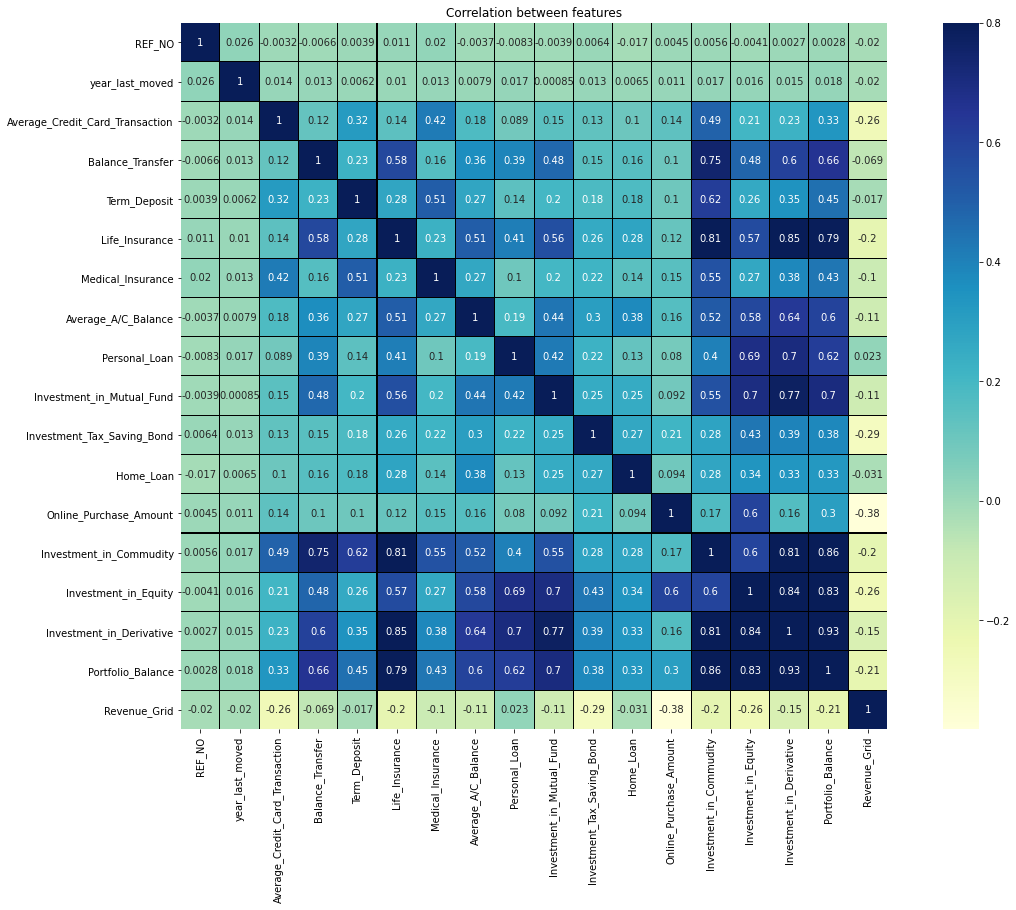

In [11]:
corr = cc_data.corr()
plt.figure(figsize = (20,13))
sns.heatmap(corr, vmax=.8, linewidth=.01, square=True, annot=True, cmap = 'YlGnBu', linecolor='black')
plt.title('Correlation between features')

__Observation__

- **Strong** relationship exists between each independent variables **Investment_in_Commudity, Investment_in_Derivative, Portfolio_Balance**. Hence, there is **NO Multicollinearity**.


- Since there is a **Strong correlation** between few independent variables, removing them from the dataset.


- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1.


- Correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model builing__.



In [12]:
cc_data.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'],
      dtype='object')

In [13]:
cc_data.drop(['REF_NO', 'children', 'age_band', 'status', 'occupation_partner', 'family_income', 'self_employed_partner', 'year_last_moved', 'TVarea', \
              'post_code', 'post_area', 'gender', 'region', 'Portfolio_Balance', 'Investment_in_Commudity', 'Investment_in_Derivative'], axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation between features')

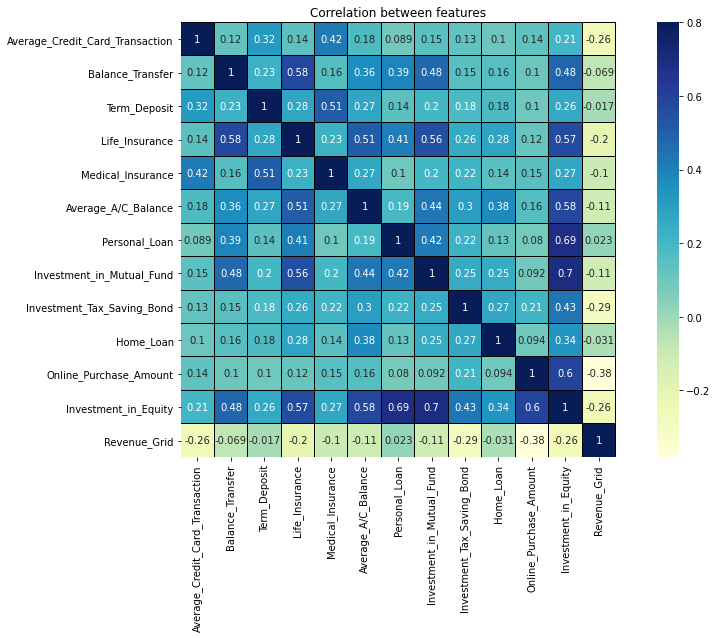

In [14]:
corr = cc_data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, vmax=.8, linewidth=.01, square=True, annot=True, cmap = 'YlGnBu', linecolor='black')
plt.title('Correlation between features')

In [15]:
cc_data = pd.get_dummies(cc_data, columns=['occupation', 'home_status', 'self_employed'], drop_first=True)

In [16]:
cc_data.head()

,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Equity,Revenue_Grid,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,self_employed_Yes
0,26.98000,29.99000,312.25000,299.79000,88.72000,108.85000,175.43000,134.35000,8.98000,55.44000,7.68000,81.79000,2,0,0,0,1,0,0,0,1,0,0,0
1,35.98000,74.48000,0.00000,99.96000,10.99000,48.45000,15.99000,0.00000,0.00000,0.00000,18.99000,13.91000,2,0,0,0,0,0,1,0,1,0,0,0
2,0.00000,24.46000,0.00000,18.44000,0.00000,0.00000,0.02000,10.46000,0.00000,0.00000,0.00000,1.75000,2,0,1,0,0,0,0,0,0,1,0,1
3,44.99000,0.00000,0.00000,0.00000,29.99000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2,0,1,0,0,0,0,0,1,0,0,0
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,9.98000,0.00000,0.00000,0.00000,1.66000,2,1,0,0,0,0,0,0,1,0,0,0


<a name = Section5></a>

---
# **5. Post Data Processing**
---



<a name = Section51></a>
### **5.1 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [17]:
X = cc_data.loc[: , cc_data.columns != 'Revenue_Grid']
y = cc_data.Revenue_Grid

In [18]:
X.head()

,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Equity,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,self_employed_Yes
0,26.98000,29.99000,312.25000,299.79000,88.72000,108.85000,175.43000,134.35000,8.98000,55.44000,7.68000,81.79000,0,0,0,1,0,0,0,1,0,0,0
1,35.98000,74.48000,0.00000,99.96000,10.99000,48.45000,15.99000,0.00000,0.00000,0.00000,18.99000,13.91000,0,0,0,0,0,1,0,1,0,0,0
2,0.00000,24.46000,0.00000,18.44000,0.00000,0.00000,0.02000,10.46000,0.00000,0.00000,0.00000,1.75000,0,1,0,0,0,0,0,0,1,0,1
3,44.99000,0.00000,0.00000,0.00000,29.99000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,1,0,0,0,0,0,1,0,0,0
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,9.98000,0.00000,0.00000,0.00000,1.66000,1,0,0,0,0,0,0,1,0,0,0


In [19]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Revenue_Grid, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=24074)

In [21]:
print('Train cases as below')
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('\nTest cases as below')
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

Train cases as below
X_train shape:  (6499, 23)
y_train shape:  (6499,)

Test cases as below
X_test shape:  (1625, 23)
y_test shape:  (1625,)


<a name = Section52></a>
### **5.2 Data Standardization**

In [24]:
scaler = StandardScaler()

scaler.fit(X_train)
X_trains = scaler.transform(X_train)
X_tests = scaler.transform(X_test)

<a name = Section6></a>

---
# **6. Model Development & Evaluation**
---

- In this section we will **develop Logistic Regression using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **F1-Score**, also we will check for **Confusion Matrix**, **Accuracy**, **Precision**, **Recall**

<a name = Section61></a>

## **6.1 Logistic Regression - Baseline Model**

In [25]:
logreg = LogisticRegression()
logreg.fit(X_trains, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<a name = Section62></a>

## **6.2 Training Model for Prediction**

In [27]:
y_pred_train = logreg.predict(X_trains) 
y_pred_test = logreg.predict(X_tests)

<a name = Section63></a>

## **6.3 Logistic Regression Model Evaluation**

### Checking Confusion Matrix

In [28]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Actual High Networth', 'Actual Low Networth']
confusion_matrix.columns = ['Predicted High Network', 'Predicted Low Networth']
confusion_matrix

,Predicted High Network,Predicted Low Networth
Actual High Networth,135,51
Actual Low Networth,19,1420


**Observations** 
- True Positive(TP) = 135
- True Negative(TN) = 1420
- False Positive(FP) = 19
- False Negative(FN) = 51

### Checking Accuracy

In [29]:
print('Accuracy score for test data is:', accuracy_score(y_test, y_pred_test))

Accuracy score for test data is: 0.9569230769230769


### Checking Precision & Recall

In [30]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Precision score for test data is:', precision_score(y_test, y_pred_test))
print('Recall score for test data is:', recall_score(y_test, y_pred_test))

Precision score for test data is: 0.8766233766233766
Recall score for test data is: 0.7258064516129032


### Checking F1 Score

In [31]:
print('F1 score for test data is:', f1_score(y_test, y_pred_test))

F1 score for test data is: 0.7941176470588236


<a name = Section64></a>

## **6.4 Using the Model for Prediction**

In [32]:
cc_test = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/Term_3-Machine_Learning_Foundation/ML_Projects/CustomerClassification/existing_base_test.csv') 
print('Data Shape:', cc_test.shape)
cc_test.head()

Data Shape: (2031, 31)


,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,697,Zero,71+,Partner,Retired,Housewife,Own Home,"<12,500, >=10,000",No,No,1973,Meridian,BH21 2JQ,BH21,41.98000,55.47000,24.99000,29.98000,49.98000,44.47000,0.00000,45.97000,0.00000,0.00000,0.00000,Male,South West,40.48000,15.07000,28.40000,83.05000
1,7897,Zero,31-35,Partner,Unknown,Business Manager,Own Home,">=35,000",No,No,1996,Anglia,CM6 3QS,CM6,0.00000,0.00000,0.00000,99.91000,35.42000,29.49000,170.31000,133.88000,27.45000,13.47000,57.46000,Male,South East,27.07000,72.01000,82.74000,235.29000
2,4729,Zero,71+,Partner,Housewife,Retired,Own Home,"<15,000, >=12,500",No,No,1958,HTV,BA12 9JW,BA12,0.00000,154.47000,0.00000,67.47000,0.00000,87.83000,0.00000,107.88000,0.00000,0.00000,0.00000,Female,South West,44.39000,32.62000,43.86000,98.38000
3,6914,1,22-25,Partner,Other,Other,Own Home,"<17,500, >=15,000",No,No,1993,Grampian,AB22 8SP,AB22,18.98000,60.98000,0.00000,17.99000,9.99000,0.00000,102.43000,44.96000,0.00000,0.00000,0.00000,Female,Scotland,21.59000,24.57000,29.23000,86.32000
4,2795,Zero,65-70,Widowed,Retired,Unknown,Own Home,"< 4,000",No,No,1976,Meridian,PO37 6AD,PO37,0.00000,144.90000,0.00000,123.38000,0.00000,32.98000,0.00000,33.96000,6.99000,17.93000,5.45000,Female,South East,53.66000,16.22000,32.89000,102.99000


In [34]:
cc_test['occupation'].value_counts()

Professional         500
Retired              407
Secretarial/Admin    362
Housewife            271
Business Manager     154
Unknown              118
Manual Worker        105
Other                105
Student                9
Name: occupation, dtype: int64

In [35]:
cc_test.loc[cc_test['occupation'] == 'Unknown', ['occupation']] = cc_test['occupation'].mode()[0]

In [36]:
cc_test['home_status'].value_counts()

Own Home                1907
Rent Privately            56
Rent from Council/HA      43
Live in Parental Hom      19
Unclassified               6
Name: home_status, dtype: int64

In [37]:
cc_test.loc[cc_test['home_status'] == 'Unclassified', ['home_status']] = cc_test['home_status'].mode()[0]

In [38]:
cc_test['family_income'].value_counts()

>=35,000             503
<27,500, >=25,000    258
<30,000, >=27,500    198
<25,000, >=22,500    177
<20,000, >=17,500    158
<12,500, >=10,000    142
<15,000, >=12,500    121
<17,500, >=15,000    113
<10,000, >= 8,000    111
<22,500, >=20,000    111
< 8,000, >= 4,000     74
< 4,000               45
Unknown               20
Name: family_income, dtype: int64

In [39]:
cc_test.loc[cc_test['family_income'] == 'Unknown', ['family_income']] = cc_test['family_income'].mode()[0]

In [41]:
cc_test['gender'].value_counts()

Female     1528
Male        499
Unknown       4
Name: gender, dtype: int64

In [42]:
cc_test.loc[cc_test['gender'] == 'Unknown', ['gender']] = cc_test['gender'].mode()[0]

In [43]:
cc_test.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,697,Zero,71+,Partner,Retired,Housewife,Own Home,"<12,500, >=10,000",No,No,1973,Meridian,BH21 2JQ,BH21,41.98000,55.47000,24.99000,29.98000,49.98000,44.47000,0.00000,45.97000,0.00000,0.00000,0.00000,Male,South West,40.48000,15.07000,28.40000,83.05000
1,7897,Zero,31-35,Partner,Professional,Business Manager,Own Home,">=35,000",No,No,1996,Anglia,CM6 3QS,CM6,0.00000,0.00000,0.00000,99.91000,35.42000,29.49000,170.31000,133.88000,27.45000,13.47000,57.46000,Male,South East,27.07000,72.01000,82.74000,235.29000
2,4729,Zero,71+,Partner,Housewife,Retired,Own Home,"<15,000, >=12,500",No,No,1958,HTV,BA12 9JW,BA12,0.00000,154.47000,0.00000,67.47000,0.00000,87.83000,0.00000,107.88000,0.00000,0.00000,0.00000,Female,South West,44.39000,32.62000,43.86000,98.38000
3,6914,1,22-25,Partner,Other,Other,Own Home,"<17,500, >=15,000",No,No,1993,Grampian,AB22 8SP,AB22,18.98000,60.98000,0.00000,17.99000,9.99000,0.00000,102.43000,44.96000,0.00000,0.00000,0.00000,Female,Scotland,21.59000,24.57000,29.23000,86.32000
4,2795,Zero,65-70,Widowed,Retired,Unknown,Own Home,"< 4,000",No,No,1976,Meridian,PO37 6AD,PO37,0.00000,144.90000,0.00000,123.38000,0.00000,32.98000,0.00000,33.96000,6.99000,17.93000,5.45000,Female,South East,53.66000,16.22000,32.89000,102.99000


Text(0.5, 1.0, 'Correlation between features')

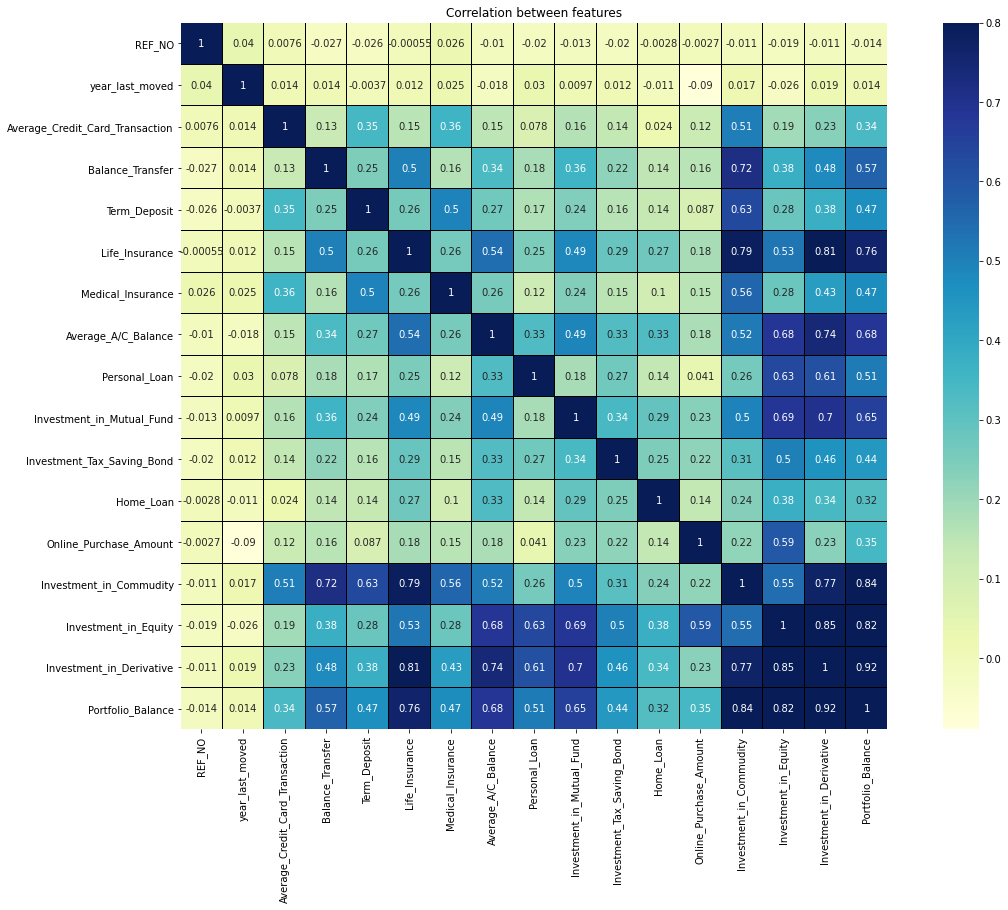

In [44]:
corr = cc_test.corr()
plt.figure(figsize = (20,13))
sns.heatmap(corr, vmax=.8, linewidth=.01, square=True, annot=True, cmap = 'YlGnBu', linecolor='black')
plt.title('Correlation between features')

In [45]:
cc_test.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance'],
      dtype='object')

In [46]:
cc_test.drop(['REF_NO', 'children', 'age_band', 'status', 'occupation_partner', 'family_income', 'self_employed_partner', 'year_last_moved', 'TVarea', \
              'post_code', 'post_area', 'gender', 'region', 'Portfolio_Balance', 'Investment_in_Commudity', 'Investment_in_Derivative'], axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation between features')

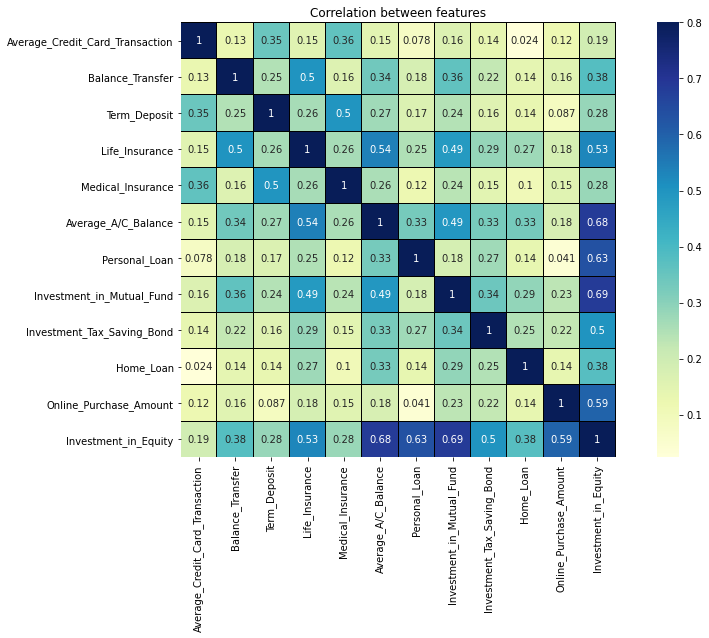

In [47]:
corr = cc_test.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, vmax=.8, linewidth=.01, square=True, annot=True, cmap = 'YlGnBu', linecolor='black')
plt.title('Correlation between features')

In [48]:
cc_test = pd.get_dummies(cc_test, columns=['occupation', 'home_status', 'self_employed'], drop_first=True)

In [49]:
cc_test.head()

,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Equity,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,self_employed_Yes
0,41.98000,55.47000,24.99000,29.98000,49.98000,44.47000,0.00000,45.97000,0.00000,0.00000,0.00000,15.07000,0,0,0,0,1,0,0,1,0,0,0
1,0.00000,0.00000,0.00000,99.91000,35.42000,29.49000,170.31000,133.88000,27.45000,13.47000,57.46000,72.01000,0,0,0,1,0,0,0,1,0,0,0
2,0.00000,154.47000,0.00000,67.47000,0.00000,87.83000,0.00000,107.88000,0.00000,0.00000,0.00000,32.62000,1,0,0,0,0,0,0,1,0,0,0
3,18.98000,60.98000,0.00000,17.99000,9.99000,0.00000,102.43000,44.96000,0.00000,0.00000,0.00000,24.57000,0,0,1,0,0,0,0,1,0,0,0
4,0.00000,144.90000,0.00000,123.38000,0.00000,32.98000,0.00000,33.96000,6.99000,17.93000,5.45000,16.22000,0,0,0,0,1,0,0,1,0,0,0


In [51]:
X_cc_test = cc_test.loc[: , cc_test.columns != 'Revenue_Grid']

In [52]:
X_cc_tests = scaler.transform(X_cc_test)
y_cc_test_predict = logreg.predict(X_cc_tests)

In [56]:
y_cc_test_predict = pd.DataFrame(y_cc_test_predict)

In [58]:
y_cc_test_predict.to_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/Term_3-Machine_Learning_Foundation/ML_Projects/CustomerClassification/cc_test_output.csv', index=False, header=False)

<a name = Section9></a>

---
# **7. Conclusion**
---

- Implemented the Logistic regression approach on the **Customer Classification** problem with the data provided. Along with that the test data was predicted for.

- The best **Logisitic Regression** model for this dataset is found with **Random State = 24074** for **80-20** train-test split.
